In [3]:
import matplotlib.pyplot as plt
import numpy as np


In [86]:
class Signal:
    def __init__(self, amp, freq, fs, type):
        self.amplitude = amp
        self.frequency = freq
        self.time = np.linspace(0, 1, fs)
        self.signalType = type

    def getSignal(self):
        if self.signalType == "sin":
            return self.amplitude * np.sin(2 * np.pi * self.frequency * self.time)
        else:
            return self.amplitude * np.cos(2 * np.pi * self.frequency * self.time)

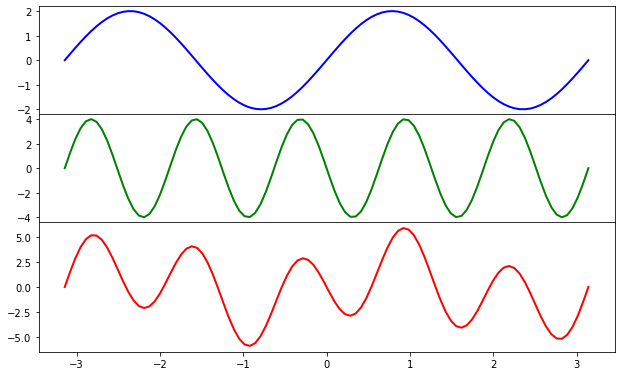

In [88]:
# periodic signal  with amp as amplitude and freq for frequency and t for period

left, width = 0.1, 0.8
line1 = [left, 0.65, width, 0.25]
line2 = [left, 0.4, width, 0.25]
line3 = [left, 0.1, width, 0.3]

fig = plt.figure(figsize=(10, 6))

ax1 = fig.add_axes(line1)
ax2 = fig.add_axes(line2, sharex=ax1)
ax3 = fig.add_axes(line3, sharex=ax1)

t = np.linspace(-np.pi, np.pi, 100)

signal1 = Signal(2, 2, 100, "sin").getSignal()
signal2 = Signal(4, 5, 100, "sin").getSignal()

res = signal1 + signal2

ax1.plot(t, signal1, color="b", lw=2)
ax2.plot(t, signal2, color="g", lw=2)
ax3.plot(t, res, color="r", lw=2)

In [112]:
def DFT(signal):
    # reconstructing the waves using rotating vectors exploiting discrete signals harmonics feature
    N = len(signal)
    fs = 100
    nyquist = fs/2
    coeff = []
    freq = np.array(list(range(0, N-1)))
    sine_t = np.linspace(0, N-1, N)/N

    # Generating different signals anf integrating 
    for i in range(N-1):
        sine_wave = np.exp(-2*np.pi*(1j)*freq[i]*sine_t)
        coeff.append(sine_wave@np.transpose(signal))  # integration
    
    reconstructed_signals = np.zeros((1, N), dtype = 'complex')
    coeff = np.array(coeff)
    coeff = coeff/ N

    for i in range(0, len(freq)):
        reconstructed_signals = reconstructed_signals + (coeff[i] * np.exp(2*np.pi*(1j)*freq[i]*sine_t))

    m = np.abs(coeff)
    # ptsHz = np.linspace(0,nyquist,(N/2)+1); 
    amp  = np.sqrt(coeff.real**2 + coeff.imag**2)*2
    plt.plot(freq, amp[:len(freq)])
    # pts_hz = np.linspace(0,nyquist,int((N/2)+1));
    # m = list(map(lambda x: x*2, sine_t))
    # t = np.linspace(-np.pi, np.pi, 1000)
    # plt.plot(t, reconstructed_signals.real.reshape(-1))
    # plt.grid(True, which='both')
    # plt.axhline(y=0, color='k')
    plt.show()
    return freq[:len(freq)//2] , amp[:len(amp)//2], reconstructed_signals

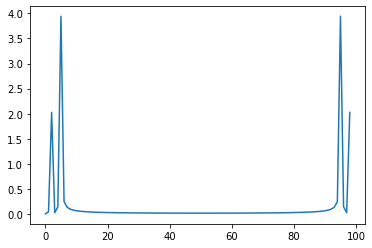

In [113]:
freq , m, reconstructed_signal  = DFT(res)

In [119]:
freq1 = freq[np.argsort(m)[::-1][1]]
freq2 = freq[np.argsort(m)[::-1][0]]
freq1,freq2
m1 = m[np.argsort(m)[::-1][1]]
m2 = m[np.argsort(m)[::-1][0]]


d:\Users\miret\anaconda3\envs\nlp\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


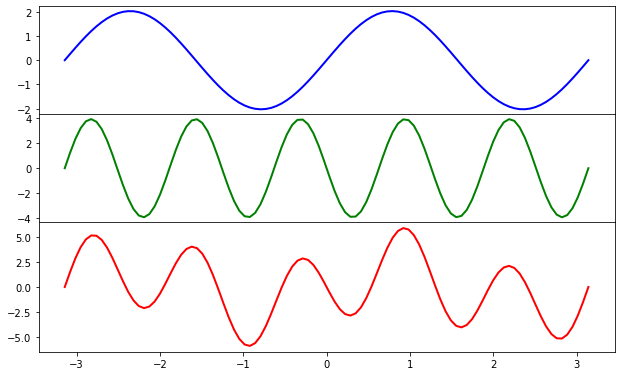

In [123]:
left, width = 0.1, 0.8
line1 = [left, 0.65, width, 0.25]
line2 = [left, 0.4, width, 0.25]
line3 = [left, 0.1, width, 0.3]

fig = plt.figure(figsize=(10, 6))

ax1 = fig.add_axes(line1)
ax2 = fig.add_axes(line2, sharex=ax1)
ax3 = fig.add_axes(line3, sharex=ax1)

t = np.linspace(-np.pi, np.pi, 100)

signal1 = Signal(m1, freq1, 100, "sin").getSignal()
signal2 = Signal(m2, freq2, 100, "sin").getSignal()

res = signal1 + signal2

ax1.plot(t, signal1, color="b", lw=2)
ax2.plot(t, signal2, color="g", lw=2)
ax3.plot(t, reconstructed_signal.reshape(-1), color="r", lw=2)

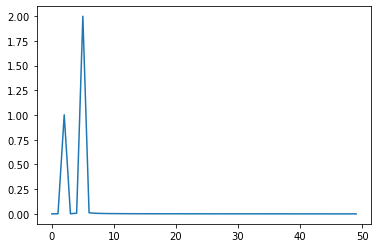

In [83]:
plt.plot(freq[:50], m[:50])
